<a href="https://colab.research.google.com/github/swang41/002_MachineLearning_eBook/blob/master/Visualizing_Filters_of_a_CNN_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualizing Filters of a Convolutional Neural Network

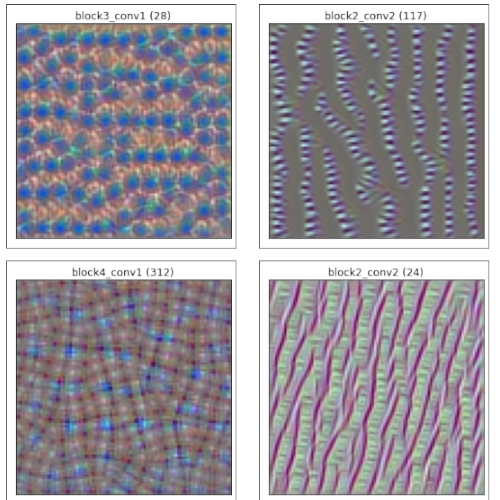

## Task 2: Downloading the Model

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

print("TensorFlow version", tf.__version__)

TensorFlow version 2.6.0


In [2]:
model = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(96, 96, 3)
)

model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
______________________________________________________________

## Task 3: Get Layer Output

In [5]:
def get_submodel(layer_name):
  return tf.keras.models.Model(
      model.input,
      model.get_layer(layer_name).output
  )

get_submodel('block1_conv2').summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


## Task 4: Image Visualization

In [9]:
def create_image():
  return tf.random.uniform((96, 96, 3), minval=-.5, maxval=.5)

def plot_image(image, title="random"):
  image = image - tf.math.reduce_min(image)
  image = image / tf.math.reduce_max(image)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()


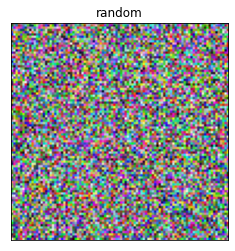

In [10]:
image = create_image()
plot_image(image)

## Task 5: Training Loop

In [16]:
def visualize_filter(layer_name, f_index=None, iters=50):
  submodel = get_submodel(layer_name)
  num_filters = submodel.output.shape[-1]
  
  if f_index is None:
    f_index = random.randint(0, num_filters-1)
  assert num_filters > f_index, 'f_index is out of boundary'

  image = create_image()

  verbose_step = iters // 10

  for i in range(iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out = submodel(tf.expand_dims(image, axis=0))[:, :, :, f_index]
      loss = tf.math.reduce_mean(out)
      grads = tape.gradient(loss, image)
      grads = tf.math.l2_normalize(grads)
      image += grads * 10
    
    if (i + 1) % verbose_step == 0:
      print(f'Iteration: {i + 1}, Loss: {loss.numpy():.4f}')
  
  plot_image(image, f'{layer_name}, {f_index}')

## Task 6: Final Results

In [17]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Iteration: 10, Loss: 79.7453
Iteration: 20, Loss: 119.1293
Iteration: 30, Loss: 165.7737
Iteration: 40, Loss: 220.4474
Iteration: 50, Loss: 281.8956
Iteration: 60, Loss: 347.5622
Iteration: 70, Loss: 416.7454
Iteration: 80, Loss: 487.5238
Iteration: 90, Loss: 559.5826
Iteration: 100, Loss: 632.8483


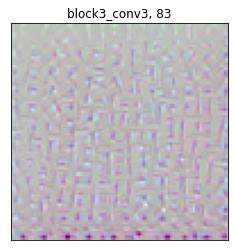

In [20]:
layer_name = 'block3_conv3' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

visualize_filter(layer_name, iters=100)